In [1]:
import numpy as np
import matplotlib.pyplot as plt

from helpers import *
from implementations import *
from encoding import *

In [4]:
# loading the data
data_path = 'data'
x_train_preclean, x_test_preclean, y_train, train_ids, test_ids = load_csv_data(data_path)

# Getting an idea of the data

In [5]:
print("X train", x_train_preclean.shape)
print("X test", x_test_preclean.shape)

X train (328135, 321)
X test (109379, 321)


Text(0, 0.5, '# of columns')

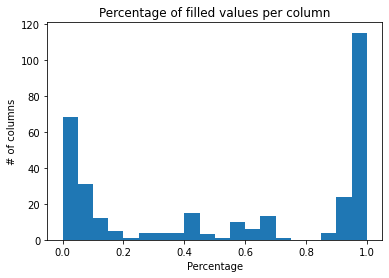

In [6]:
## Find how many values are completely empty in column
def percentageFilled(data):
    return 1 - np.isnan(data).sum() / len(data)

percentage_filled = np.apply_along_axis(percentageFilled, 0, x_train_preclean)

plt.hist(percentage_filled, bins=20)
plt.title("Percentage of filled values per column")
plt.xlabel("Percentage")
plt.ylabel("# of columns")

# Data Cleaning

In [7]:
## Process data
## 1. drop the columns with less than 20% filled values
def threshold_col_filter(data, threshold):
    """
    filter out data where the column has less than threshold percentage of data
    returns:
        indicies of columns to keep
    """
    percentage_filled = np.apply_along_axis(percentageFilled, 0, data)
    return percentage_filled > threshold


def non_constant_filter(data):
    """
    filter out where the values in the column are all the same
    """
    return np.logical_not(np.logical_or(np.isnan(np.nanstd(data, 0)), np.nanstd(data, 0) == 0))

In [8]:
def standardize(x):
    """Standardize the original data set."""
    std = np.nanstd(x, axis=0)
    mean = np.nanmean(x, axis=0)
    return np.nan_to_num((x - np.nanmean(x, axis=0)) / np.nanstd(x, axis=0)), mean, std

In [ ]:
 x_train, filter, categorical_filter, corr_filter, num_transform, cat_transform = process_train(x_train_preclean)
 x_test = process_test(x_test_preclean, filter, categorical_filter, corr_filter, num_transform, cat_transform)


# Logistic regression *WITH* regularization

In [ ]:
loss_tr,loss_tt, f1_scores, weights, y_preds = get_best_parameters(y_train, x_train, np.zeros(x_train.shape[1]), 10000, 4, 0.05, np.logspace(-4, 0, 20))

In [ ]:
num_iterations = len(losses)
iterations = range(1, num_iterations + 1)

# Create the plot
plt.figure(figsize=(7, 5))  # Adjust the figure size as needed
plt.plot(iterations, losses, linestyle='-', label='Adaptive leaning rate')
plt.plot(iterations, losses_sgd, linestyle='-', label='Annealing learning rate')
# Add labels and a title
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Learning rate')

# Show the plot
plt.grid(True)
plt.legend()

In [ ]:
y_pred_test = prediction_labels(weights[np.argmax(f1_scores)], x_test)
y_pred_test[y_pred_test == 0] = -1
create_csv_submission(test_ids, y_pred_test, "submission_1135")